In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


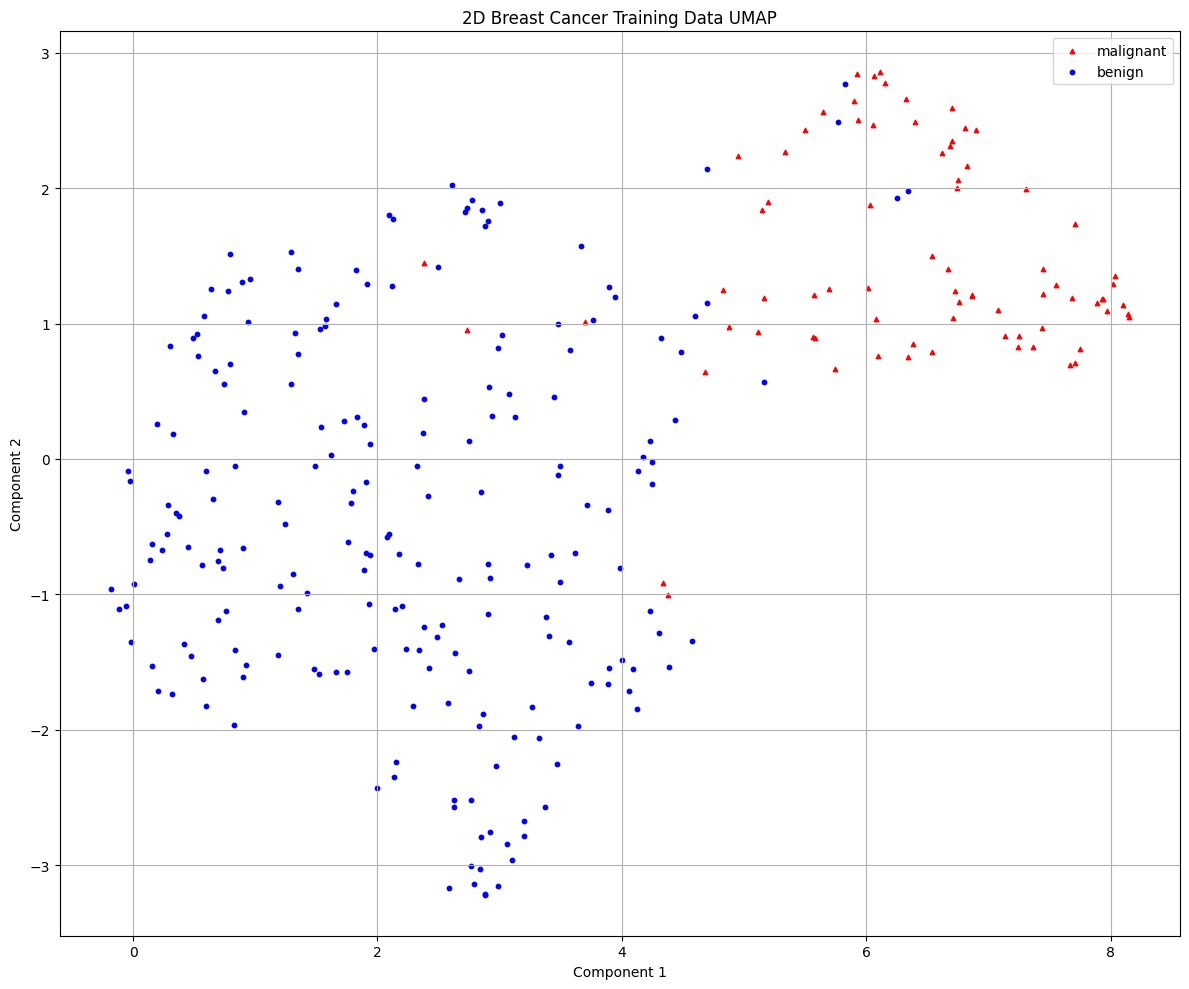

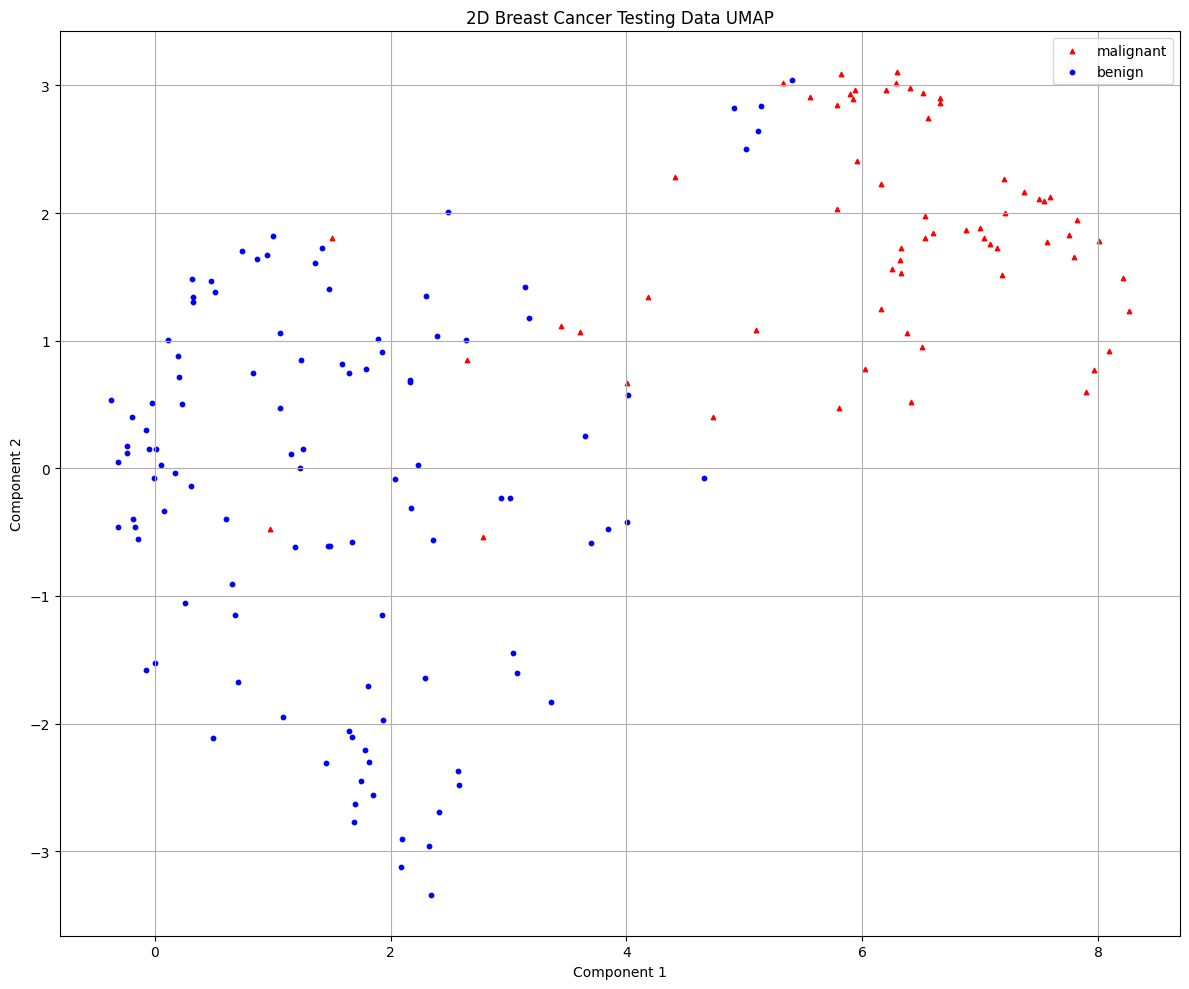

[I 2025-04-27 14:03:37,365] A new study created in memory with name: no-name-4d8f67e5-c5af-4b7f-a7d1-dfdb37d6e548
[I 2025-04-27 14:04:49,848] Trial 0 finished with value: 0.9509981851179674 and parameters: {'n_estimators': 9659, 'max_depth': 7, 'learning_rate': 0.11455043449862522, 'subsample': 0.7099273627796561, 'colsample_bytree': 0.7561367063004619, 'gamma': 4.33487225570564, 'reg_alpha': 0.00023146360743950403, 'reg_lambda': 0.011666828741174971}. Best is trial 0 with value: 0.9509981851179674.
[I 2025-04-27 14:05:50,554] Trial 1 finished with value: 0.940411373260738 and parameters: {'n_estimators': 7770, 'max_depth': 6, 'learning_rate': 0.18175177295576667, 'subsample': 0.6910070367067072, 'colsample_bytree': 0.9489903407599971, 'gamma': 1.4843286353328873, 'reg_alpha': 4.567472731014888e-06, 'reg_lambda': 0.4586703047028271}. Best is trial 0 with value: 0.9509981851179674.
[I 2025-04-27 14:06:54,337] Trial 2 finished with value: 0.9580157289776163 and parameters: {'n_estimators

Best trial:
Accuracy: 0.9617059891107077
Best hyperparameters:  {'n_estimators': 1264, 'max_depth': 5, 'learning_rate': 0.0023978058592720787, 'subsample': 0.5864696197465017, 'colsample_bytree': 0.6470695418199943, 'gamma': 2.0109688109749633, 'reg_alpha': 0.007847918675435557, 'reg_lambda': 0.0733325797999538}


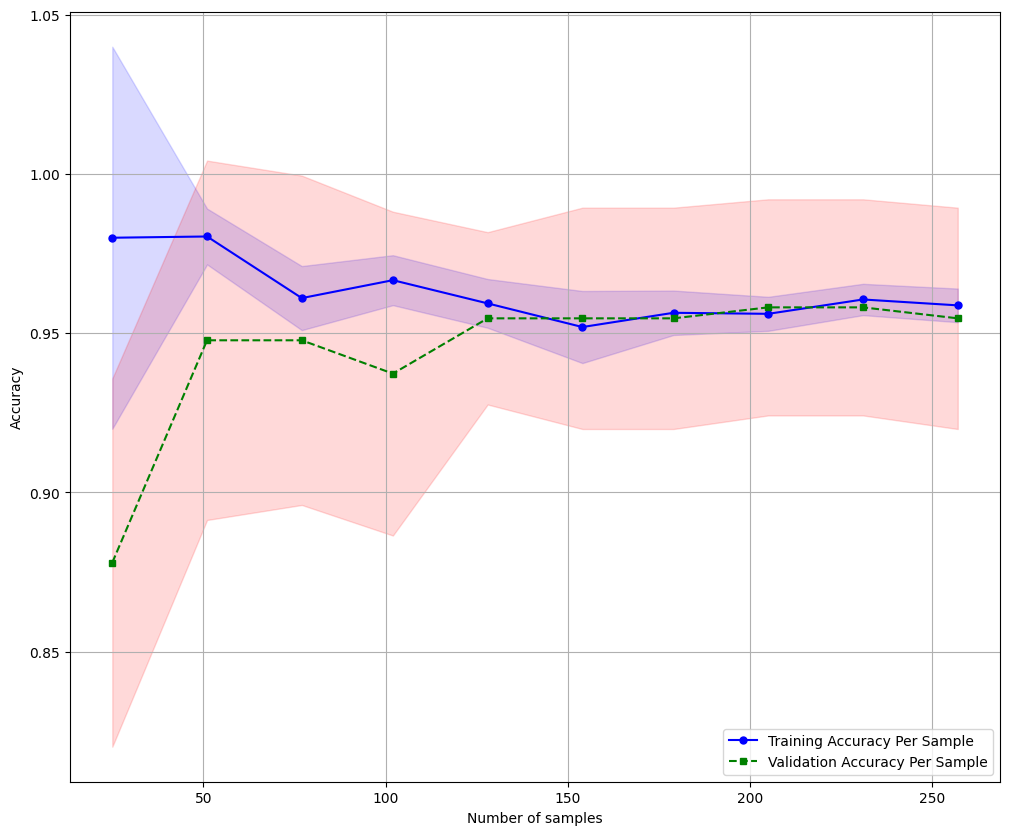

Confusion Matrix
[[ 52  12]
 [  5 102]]
Accuracy: 0.9006, Precision: 0.8947, Recall: 0.9533, F1: 0.9231, AUC: 0.9529


In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'iqr', {})

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'umap', {})

helper.train_and_evaluate_model('xgb', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)